In [1218]:
# Investment policy 

# Primary goal (Define the primary goals of the investment portfolio, such as capital preservation, income generation, or growth.)
#     maximizing capital growth in a fully passive way
    
# Risk Tolerance (Specify the level of risk the investor is willing to accept, including acceptable volatility and potential for loss) : 
#     volatility : Unlimited
#     ongoing MDD : Unlimited
    
# Asset Allocation (Determine the target distribution of investments across various asset classes (e.g., equities, bonds, cash) to balance risk and return.):
#     free
    
# Time Horizon (Identify the expected duration for holding investments, which influences asset selection and risk tolerance.):
#     Infinite
    
# Performance Benchmarks (Establish benchmarks or indices against which the portfolio’s performance will be measured.):
#     MSCI ACWI

# Liquidity Needs (Outline the need for liquidity in the portfolio to meet short-term cash flow requirements.):
#     NA

# Diversification Strategy (Describe the approach to diversification to minimize unsystematic risk.):
#     Minimum 15 assets (found this figure by asking Copilot quickly) in at least 2 industries

# Selection Criteria for Investments (Set criteria for selecting individual securities or funds, including quality, valuation, and other key metrics.):
#     Single index

# Rebalancing Guidelines (Define when and how the portfolio will be rebalanced to maintain target asset allocation.):
#     NA

# Monitoring and Review Procedures (Detail how and when the portfolio will be reviewed and assessed to ensure alignment with investment objectives.):
#     Quarterly review to match publicly listed companies, assess performance, risks, new goals, and tax planning
    
# Tax Considerations (Address tax implications and strategies to optimize after-tax returns.):
#     NA
    
# Investment Constraints (Note any legal, regulatory, or personal restrictions on the types of investments allowed.):
#     NA
    
# Roles and Responsibilities (Assign roles and responsibilities for managing and overseeing the portfolio, including any external advisors.):
#     I am the only manager of the portfolio.
    
# Ethical and Social Considerations (Include any ethical, social, or environmental criteria for investment selection.):
#     NA
    
# Documentation and Reporting (Outline the requirements for documentation and reporting to stakeholders on the portfolio’s performance and activities.):
#     NA
    
# Communication Protocols (Establish protocols for communication among all parties involved in managing the portfolio.):
#     NA
    
# Market Conditions and Economic Assumptions (Discuss assumptions about future economic conditions and market trends that underpin the investment strategy.):
#     AI, biotech, tech, and pharamaceuticals will change the world. A small number of players will take most of the gains.
#     Being in a free market will be increasinglyunceasingly important as governments will be tempted to be more authoritarian in order
#     to handle geopolitical and social conflicts.

# Leverage (Outline the policy regarding the use of leverage, including acceptable levels and risk management measures.):
#     Not availabe on Trade Republic

#index methodlogy
#US ex financials market cap weighted top 100

#Pros of current portfolio
    #High passive return
    #no bank exposure : no correlation with financial activities in whcih I work
    
#cons
    #High volatility
    #Limited return compared to more sophisticated strategies

In [20]:
#Portfolio Risk Analysis

#1 Get data
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib . pyplot as plt
# import seaborn as sns

# Download S&P 500 and US 10 - year Treasury futures data
nasdaq100 = yf . download ('^NDX') ['Adj Close']

# Align the datasets
data = pd.DataFrame({'nasdaq100spot': nasdaq100}).dropna()

# Risk-free rates
risk_free_rates = {
    'LEP_rate': 0.04,
    'Livret_A_rate': 0.03,
    'Livret_Jeune_rate': 0.03,
    'Trade_Republic_rate': 0.0325,
    # '3M_Tbill_rate' : 0.0526
}

# Find the highest risk-free rate
risk_free_rate = max(risk_free_rates.values())

# # Print the highest risk-free rate
# print("Highest risk-free rate:", risk_free_rate)

#Tickers to try
# NASDAQ 100: ^NDX
# CAC40: ^FCHI
# Apple Inc. (AAPL): AAPL
# Tesla Inc. (TSLA): TSLA
# Microsoft Corporation (MSFT): MSFT
# Samsung Electronics Co., Ltd.: 005930.KS
# BTC-USD
# ^GSPC S&P500
# MSCI WORLD (^990100-USD-STRD)
# iShares MSCI ACWI ETF (ACWI)

[*********************100%%**********************]  1 of 1 completed


In [22]:
# 2 Calculate Returns
# Calculate daily logarithmic returns
data ['asset_log_returns'] = np . log ( data ['nasdaq100spot'] / data ['nasdaq100spot']. shift (1) )

# Calculate cumulative returns for nasdaq100
data ['Cumulative_log_Returns'] = data ['asset_log_returns'].cumsum ()
data ['Cumulative_arithmetic_Returns'] = np.exp(data ['Cumulative_log_Returns']) - 1

# Calculate Annualized, monthly and daily returns
total_arithmetic_return = np.exp(sum(data['asset_log_returns'].dropna()))
n_years = len(data) / 252  # Assuming 252 trading days in a year
n_months = len(data) / 21  # Assuming 21 trading days in a month

annualized_arithmetic_return = (total_arithmetic_return ** (1 / n_years) - 1)
monthly_arithmetic_return = (total_arithmetic_return ** (1 / n_months) - 1)
daily_arithmetic_return = np.mean(data ['asset_log_returns'])

# Calculate quartiles and median
q1 = data ['asset_log_returns'].quantile(0.25)
q2 = data ['asset_log_returns'].quantile(0.50)  # Also the median
q3 = data ['asset_log_returns'].quantile(0.75)

# Interquartile range (IQR)
iqr = q3 - q1

In [24]:
# Risk functions

def calculate_skewness(returns, annual_volatility): #make sure return frequency and vol frequency are the same!
    """
    Calculate the skewness of historical return data given the annual volatility.
    
    :param returns: List or array of historical return data
    :param annual_volatility: Annual volatility of the returns
    :return: Skewness of the return data
    """
    # Step 2: Calculate the Mean Return
    mean_return = np.mean(returns)
    
    # Step 3: Calculate Deviations from the Mean
    deviations = returns - mean_return
    
    # Step 4: Cube Each Deviation
    cubed_deviations = deviations ** 3
    
    # Step 5: Average of Cubed Deviations
    cubed_deviation_avg = np.mean(cubed_deviations)
    
    # Step 7: Calculate Skewness using the provided annual volatility
    skewness = cubed_deviation_avg / (annual_volatility ** 3)
    
    return skewness

def calculate_kurtosis(returns, annual_volatility): #make sure return frequency and vol frequency are the same!
    """
    Calculate the skewness of historical return data given the annual volatility.
    
    :param returns: List or array of historical return data
    :param annual_volatility: Annual volatility of the returns
    :return: Skewness of the return data
    """
    # Step 2: Calculate the Mean Return
    mean_return = np.mean(returns)
    
    # Step 3: Calculate Deviations from the Mean
    deviations = returns - mean_return
    
    # Step 4: Cube Each Deviation
    cubed_deviations = deviations ** 4
    
    # Step 5: Average of Cubed Deviations
    cubed_deviation_avg = np.mean(cubed_deviations)
    
    # Step 7: Calculate Skewness using the provided annual volatility
    kurtosis = cubed_deviation_avg / (annual_volatility ** 4) - 3
    
    return kurtosis

# Function to calculate the annual Sharpe Ratio
def calculate_annual_sharpe_ratio(annualized_return, risk_free_rate, annualized_volatility):
    # Calculate the excess return (annualized return - risk-free rate)
    excess_return = annualized_return - risk_free_rate
    # Calculate the Sharpe Ratio
    sharpe_ratio = excess_return / annualized_volatility
    return sharpe_ratio

def calculate_historical_var(returns, confidence_level):
    """
    Calculate historical Value at Risk (VaR) at the specified confidence level.

    Parameters:
    returns (array-like): Array or list of historical returns.
    confidence_level (float): Confidence level for VaR calculation, expressed as a percentage (e.g., 95 for 95%).

    Returns:
    float: Historical VaR at the specified confidence level.
    """
    # Convert returns to a NumPy array
    returns = np.array(returns)
    
    # Calculate the percentile corresponding to the confidence level
    var = np.percentile(returns, 100 - confidence_level, method = "higher") #by doing 100- we get the values above confidence level
    
    # Compute the VaR (multiply by -1 since returns are typically negative for losses)
    # var = -percentile
    
    return var

In [26]:
# 3 Calculate risk factors

# Calculate Volatility
annualized_volatility = data['asset_log_returns'].std() * np.sqrt(252)
daily_volatility = data['asset_log_returns'].std()

# Calculate ongoing drawdown
rolling_max = data ['nasdaq100spot']. cummax ()
data ['drawdown'] = rolling_max - data ['nasdaq100spot']
data['drawdown_percent'] = data ['drawdown']/rolling_max * 100
max_drawdown = data['drawdown_percent'].max()

# Calculate Skewness
skewness = calculate_skewness(data ['asset_log_returns'], daily_volatility)

# Calculate Kurtosis
kurtosis = calculate_kurtosis(data ['asset_log_returns'], daily_volatility)

#calculate_annual_sharpe_ratio
annual_sharpe_ratio = calculate_annual_sharpe_ratio(annualized_arithmetic_return, risk_free_rate, annualized_volatility)

positive_percentage = (np.sum(data ['asset_log_returns'] > 0) / len(data ['asset_log_returns'])) * 100

#Calculate Historical Value at Risk
confidence_level = 99
Historical_VaR = calculate_historical_var(data ['asset_log_returns'].dropna(), confidence_level)
Historical_VaR

#MDD 1-day
MDD_1D = min(data ['asset_log_returns'].dropna())

annualized_arithemetic_return: 40.63 %
Annualized Volatility: 58.0 %
Maximum Drawdown: 83.0 %
annual_sharpe_ratio: 0.63

daily_arithmetic_return: 0.14 %
monthly_arithmetic_return: 2.88 %

Skewness: -0.7
Kurtosis: 11.39

risk_free_rate: 0.04 %
Q1: -1.27
Q2/median: 0.13
Q3: 1.67
positive_returns_percentage: 52.8 %
Historical_VaR_percentage at confidence_level of 99 is:  -10.79 %
MDD_1D: -46.47 %


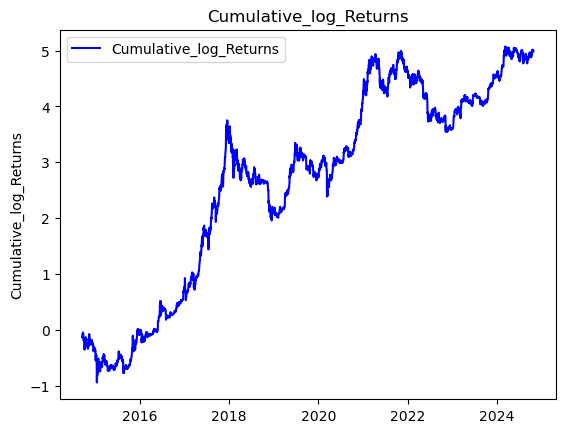

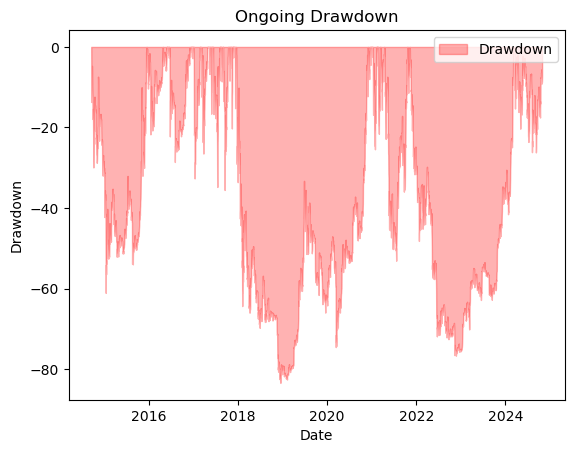

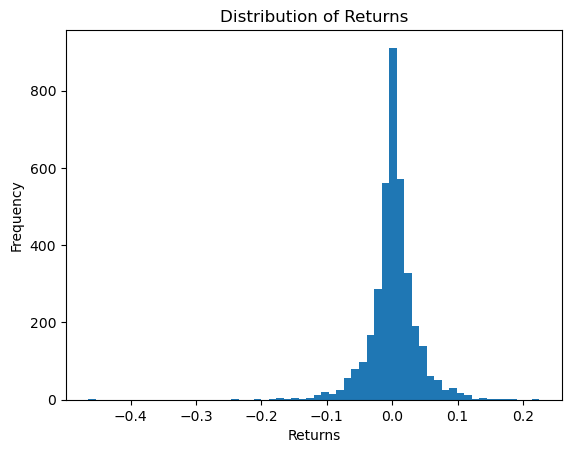

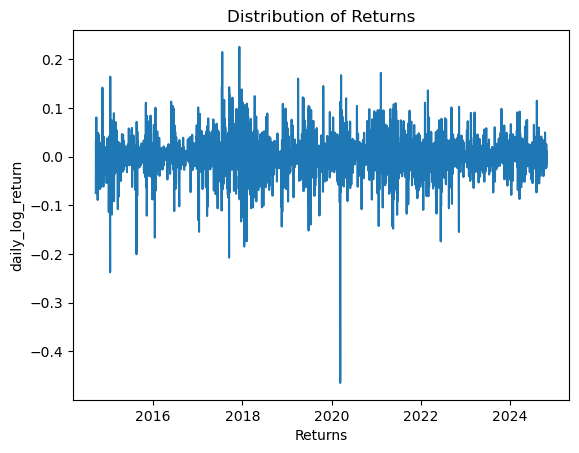

personal note : this does not seem to include the dividends/coupons reinvestment, unless the indices are Total retun?


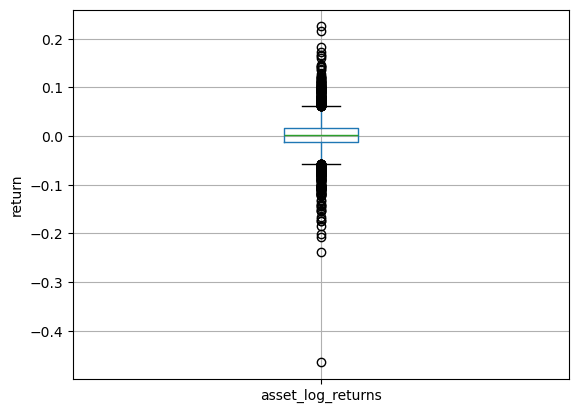

In [28]:
#Print & Plot desired outputs

#Print asset statistics
print("annualized_arithemetic_return:", np.round(annualized_arithmetic_return *100 ,2),"%")
print("Annualized Volatility:", np.round(annualized_volatility*100,0),"%")
print("Maximum Drawdown:", round(max_drawdown,0),"%") #in percentage
print("annual_sharpe_ratio:", np.round(annual_sharpe_ratio,2))

print("\ndaily_arithmetic_return:", np.round(daily_arithmetic_return *100 ,2),"%")
print("monthly_arithmetic_return:", np.round(monthly_arithmetic_return *100 ,2),"%")

print("\nSkewness:", np.round(skewness,1))
print("Kurtosis:", np.round(kurtosis,2))

print("\nrisk_free_rate:", risk_free_rate,"%")
print("Q1:",np.round(q1*100,2))
print("Q2/median:",np.round(q2*100,2))
print("Q3:",np.round(q3*100,2))
# print("IQR:",np.round(iqr*100,2))
print("positive_returns_percentage:",np.round(positive_percentage,1),"%")
print("Historical_VaR_percentage at confidence_level of", confidence_level, "is: ", np.round(Historical_VaR * 100,2),"%")
print("MDD_1D:",np.round(MDD_1D*100,2),"%")

# Plotting the results
# Plotting cumulative returns on the first subplot
plt.plot(data.index, data['Cumulative_log_Returns'], label='Cumulative_log_Returns', color='blue')
plt.title('Cumulative_log_Returns')
plt.ylabel('Cumulative_log_Returns')
plt.legend()
plt.show()

# Plotting drawdown on the second subplot
plt.fill_between(data.index, -data['drawdown_percent'], color='red', alpha=0.3)
plt.title('Ongoing Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend(['Drawdown'])
plt.show()

# Plot the histogram of returns
# Calculate square root of the number of data points
num_bins = int(np.sqrt(len(data['asset_log_returns'])))
# Plot histogram with the calculated number of bins
plt.hist(data['asset_log_returns'], bins=num_bins)
# Set title and labels
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
# Show the plot
plt.show()

#plot returns
plt.plot(data['asset_log_returns'])
# Set title and labels
plt.title('Distribution of Returns')
plt.xlabel('Returns')
plt.ylabel('daily_log_return')
# Show the plot
plt.show()

ax = data.boxplot(column = 'asset_log_returns')
ax.set_ylabel('return')

print("personal note : this does not seem to include the dividends/coupons reinvestment, unless the indices are Total retun?")

# Note: This exercise guides you through the process of constructing a mixed
# asset portfolio, calculating its returns, and visualizing the risk through drawdown analysis. The plot will display the cumulative returns of the portfolio
# and highlight the drawdown periods in red, offering insights into the risk-return profile of the portfolio.

In [1060]:
# Calculate ongoing drawdown
rolling_max = data ['Cumulative_Returns']. cummax ()
data ['drawdown'] = rolling_max - data ['Cumulative_Returns']
# data['drawdown_percent'] = data ['drawdown']/rolling_max * 100
max_drawdown = data['drawdown'].max()
max_drawdown*100

Date
1980-12-12           NaN
1980-12-15     -5.358076
1980-12-16    -12.981124
1980-12-17    -10.536201
1980-12-18     -7.678153
                 ...    
2024-05-20    756.453545
2024-05-21    757.136931
2024-05-22    756.380235
2024-05-23    754.251938
2024-05-24    755.897143
Name: Cumulative_Returns, Length: 10954, dtype: float64